In [ ]:
import torch
from torch import nn
from matplotlib import pyplot as plt
import cv2
import numpy
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

In [ ]:
train_data = datasets.MNIST(
    download = True ,
    root = "data",
    transform = ToTensor(),
    train = True,
)
test_data  = datasets.MNIST(
    download = True ,
    root = "data",
    transform = ToTensor(),
    train = False,
)

torch.Size([1, 28, 28])

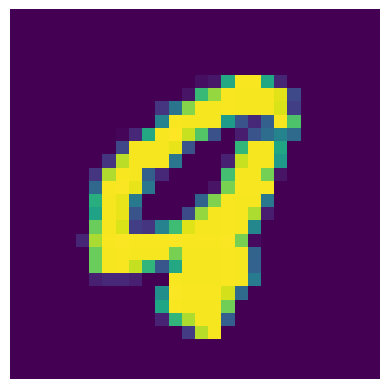

In [ ]:
img , label = train_data[torch.randint(0,len(train_data) , size = [1]).item()]
plt.imshow(img.permute(1,2,0))
plt.axis(False)
img.shape

In [ ]:
classNames = test_data.classes
classNames

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [ ]:
batch_size = 32
trainDataLoader  = DataLoader(dataset = train_data ,batch_size = batch_size , shuffle = True )
testDataLoader = DataLoader(dataset = test_data , batch_size = batch_size , shuffle = False)

##linear Model

In [ ]:
class one(nn.Module):
  def __init__(self):
    super().__init__()
    self.seq = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = 28*28 , out_features = len(classNames) ),
    )
  def forward(self ,X):
    return self.seq(X)
  def pred(self , X):
    self.eval()
    with torch.inference_mode():
      return self.seq(X)

In [ ]:
model0 = one()
loss_fn = nn.CrossEntropyLoss()

In [ ]:
def train(model = None, loss_fn =None ,lr = 0.1,epochs = 3, trainDataLoader=None  , testDataLoader = None , batch_size = 32 ):
  import torch
  optimizer = torch.optim.Adam(params = model.parameters() , lr = lr)
  from tqdm.auto import tqdm

  for epoch in tqdm(range(epochs)):
    model.train()
    iterLoss = 0
    for batch , (X,y) in enumerate(trainDataLoader):
      logits = model(X)
      loss = loss_fn(logits , y)
      iterLoss += loss
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      if(batch % 400 == 0 ): print(f"seen {batch * batch_size} / {len(trainDataLoader)*batch_size}")
    overallLoss = iterLoss / len(trainDataLoader)

    model.eval()
    with torch.inference_mode():
      testLoss = 0
      testAcc = 0
      for batch , (X , y_test) in enumerate(testDataLoader):
        test_logits = model(X)
        test_loss = loss_fn(test_logits , y_test)
        testLoss += test_loss
        currAcc=torch.sum(y_test == test_logits.argmax(dim = 1))*100 / len(y_test)
        testAcc += currAcc
    overallTestLoss = testLoss / len(testDataLoader)
    overallTestAcc = testAcc / len(testDataLoader)


    print(f"epoch {epoch} | train loss : {overallLoss:3f} , test loss : {overallTestLoss:.3f} | test accuracy {overallTestAcc:3f}%")
def show_grid(model =None, row:int = 5, col:int = 5  ,test_data=None , Cnn:int = 0 ):
  """
  def pred(self , X):
    self.eval()
    with torch.inference_mode():
      return self(X)

  """
  import matplotlib.pyplot as plt
  import torch
  fig = plt.figure(figsize = (row*2 , col*2))
  correct_count = 0
  for i in range(1, row*col +1 ):
    fig.add_subplot(row ,col , i)
    rndIdx = torch.randint(0,len(test_data) , size = [1]).item()
    img , label = test_data[rndIdx]

    if(not Cnn): pred = model.pred(img).argmax(dim=1).item()
    else: pred = model.pred(img.unsqueeze(dim=1)).argmax(dim=1).item()
    correct = (pred == label)
    correct_count+= correct

    plt.title(f"{classNames[pred]} | {classNames[label]}" , c = "green" if correct else "red" , fontsize = 8)
    plt.imshow(img.permute(1,2,0))
    plt.axis(False)
  print(f"correct : {correct_count} , Wrong : {row*col - correct_count}")
    #return {"correct" : correct_count , "Wrong" : row*col - correct_count}


In [ ]:
train(model = model0 , loss_fn = loss_fn , lr = 0.3 , epochs = 3 , trainDataLoader = trainDataLoader , testDataLoader = testDataLoader)

  0%|          | 0/3 [00:00<?, ?it/s]

seen 0 / 60000
seen 12800 / 60000
seen 25600 / 60000
seen 38400 / 60000
seen 51200 / 60000
epoch 0 | train loss : 6.097671 , test loss : 7.036 | test accuracy 88.947685%
seen 0 / 60000
seen 12800 / 60000
seen 25600 / 60000
seen 38400 / 60000
seen 51200 / 60000
epoch 1 | train loss : 6.128188 , test loss : 7.830 | test accuracy 87.509987%
seen 0 / 60000
seen 12800 / 60000
seen 25600 / 60000
seen 38400 / 60000
seen 51200 / 60000
epoch 2 | train loss : 5.983885 , test loss : 6.743 | test accuracy 89.506790%


correct : 24 , Wrong : 1


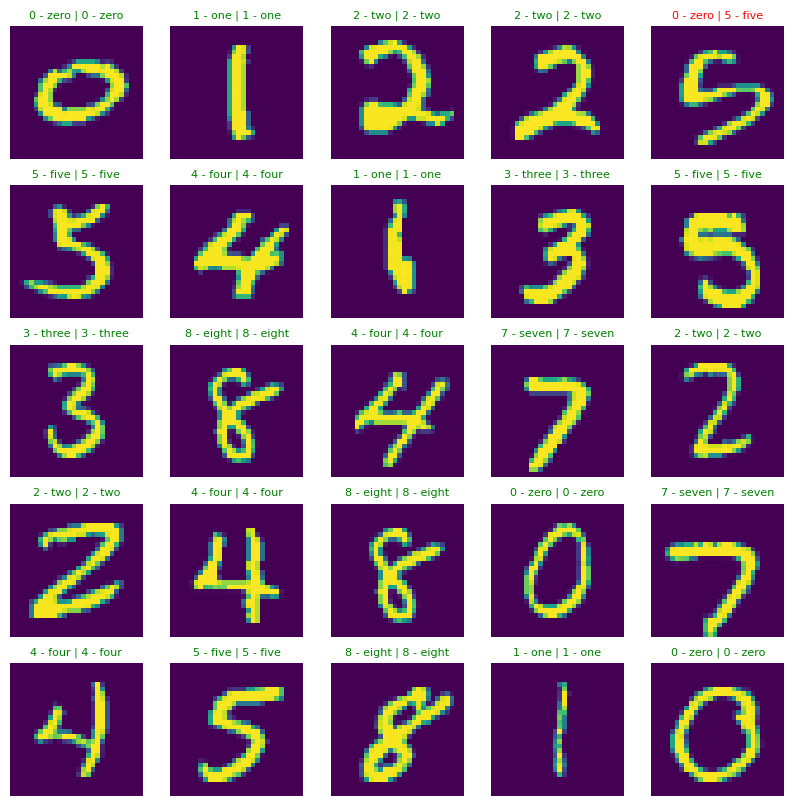

In [ ]:
show_grid(row = 5, col = 5,model = model0 , test_data = test_data)

##Creating a CNN model

In [ ]:
class two(nn.Module):
  def __init__(self):
    super().__init__()
    self.b1 = nn.Sequential(
        nn.Conv2d(in_channels = 1 , out_channels = 10 , kernel_size  = (3,3) ,stride = 1 , padding = 1 ),
        nn.ReLU(),
        nn.Conv2d(in_channels = 10 , out_channels = 10 , kernel_size = (3,3) , stride = 1 , padding = 1 ),
        nn.MaxPool2d(kernel_size = (2,2) , stride = 2),
    )
    self.b2 = nn.Sequential(
        nn.Conv2d(in_channels = 10 , out_channels = 10 , kernel_size = (3,3) , stride = 1 , padding = 1 ),
        nn.ReLU(),
        nn.Conv2d(in_channels = 10 , out_channels = 10 , kernel_size = (3,3) , stride = 1 , padding = 1 ),
        nn.MaxPool2d(kernel_size = (2,2) , stride = 1),
     )
    self.Classify = nn.Sequential(
      nn.Flatten(),
      nn.Linear(in_features =10*13*13 , out_features = 10),
    )
  def forward(self,X):
    try :
      X1 = self.b1(X)
      #print(X1.shape)
      X2 = self.b2(X1)
      #print(X2.shape)
      X3 =  self.Classify(X2)
      return X3
    except Exception as  e:

      print(e)
      print(e.__traceback__.tb_lineno)
    return None

  def pred(self , X):
    self.eval()
    with torch.inference_mode():
      return self(X)


In [ ]:
model2 = two()
loss_fn = nn.CrossEntropyLoss()

In [ ]:
train(model = model2 , loss_fn = loss_fn , lr = 0.001 , epochs = 3 , trainDataLoader = trainDataLoader , testDataLoader = testDataLoader)

  0%|          | 0/3 [00:00<?, ?it/s]

seen 0 / 60000
seen 12800 / 60000
seen 25600 / 60000
seen 38400 / 60000
seen 51200 / 60000
epoch 0 | train loss : 0.047778 , test loss : 0.045 | test accuracy 98.632187%
seen 0 / 60000
seen 12800 / 60000
seen 25600 / 60000
seen 38400 / 60000
seen 51200 / 60000
epoch 1 | train loss : 0.035841 , test loss : 0.040 | test accuracy 98.791931%
seen 0 / 60000
seen 12800 / 60000
seen 25600 / 60000
seen 38400 / 60000
seen 51200 / 60000
epoch 2 | train loss : 0.029759 , test loss : 0.040 | test accuracy 98.911743%


correct : 24 , Wrong : 1


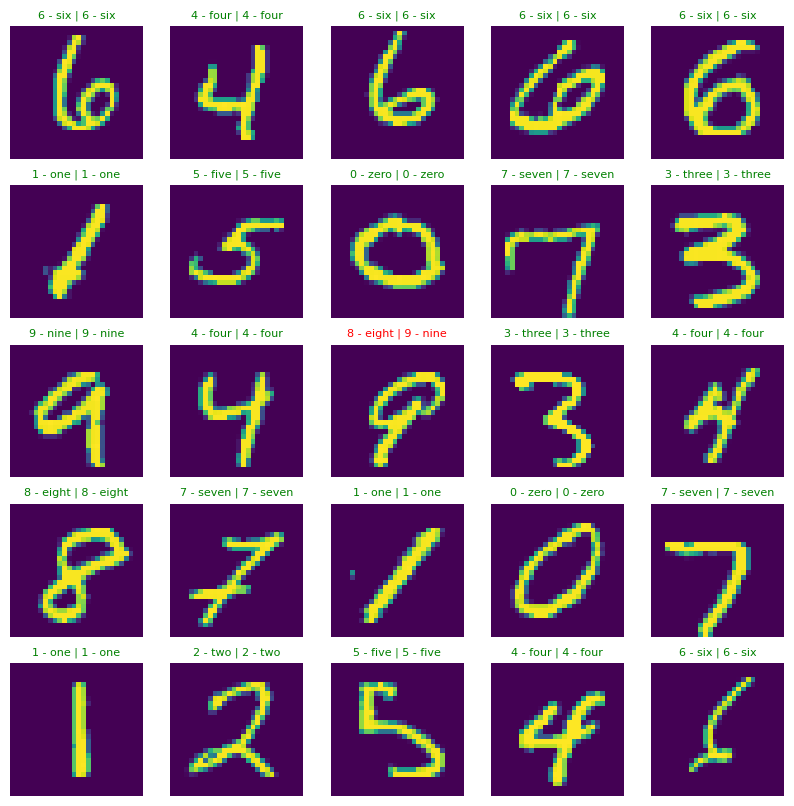

In [ ]:
show_grid(model = model2 , row = 5 ,col =5 ,Cnn = 1 , test_data = train_data)